In [4]:
import numpy as np
lst = [45,66,32,75,90,99,56,35,79,43,87,54,33]
minimum,q1,median,q3,maximum = np.quantile(lst,[0,0.25,0.50,0.75,1.0])


In [5]:
iqr = q3 - q1 # type: ignore
print(iqr)

36.0


In [6]:
lower_fence = q1-1.5*(iqr)
higher_fence = q3+1.5*(iqr)

In [7]:
lower_fence


np.float64(-11.0)

In [8]:
higher_fence

np.float64(133.0)

<Axes: >

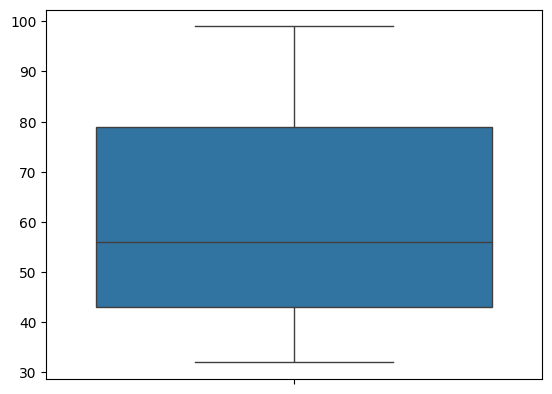

In [ ]:
import seaborn as sns
sns.boxplot(lst) # type: ignore

In [10]:
lst = [-120,-500,45,66,32,75,90,99,56,35,79,43,87,54,33,100,120,130]



<Axes: >

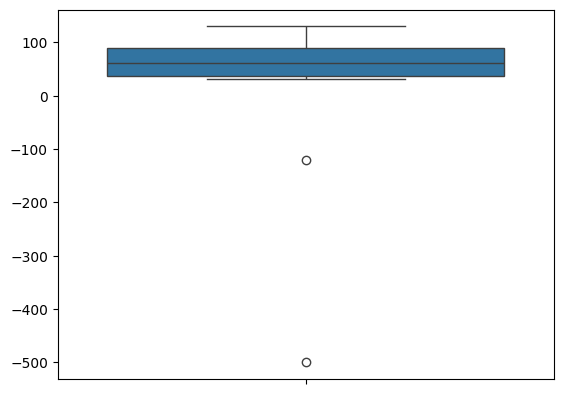

In [25]:
sns.boxplot(lst)

In [32]:
## Nominal Enocoding/ OHE Encoding
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    'Color': ['red','blue','green','red','blue']
})

df




,Color
0,red
1,blue
2,green
3,red
4,blue


In [18]:
#one hot encoder
encoder = OneHotEncoder()

In [21]:
#perform fit and transform
encoded = encoder.fit_transform(df[['Color']]).toarray()
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [23]:
encoder_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
encoder_df

,Color_blue,Color_green,Color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [24]:
pd.concat([df,encoder_df],axis=1)

,Color,Color_blue,Color_green,Color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,red,0.0,0.0,1.0
4,blue,1.0,0.0,0.0


In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({
    'Color': ['red','blue','green','red','blue']
})
enc = pd.get_dummies(df, columns=['Color']).astype(int)
enc


,Color_blue,Color_green,Color_red
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [34]:
import seaborn as sns


In [37]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [43]:
df_encoded = pd.get_dummies(df,columns=['sex','smoker','day','time'],drop_first=True)
df_encoded


,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,False,True,False,True,False,True
240,27.18,2.00,2,True,False,False,True,False,True
241,22.67,2.00,2,False,False,False,True,False,True
242,17.82,1.75,2,False,True,False,True,False,True
